# Predicting Breast Cancer Diagnosis

Author: Aaron Villegas

Course Project, UC Irvine, Math 10, Winter 2025

## Questions to be answered before you submit your project.

* What is your Student ID number? 
**18257093**



* What is the "extra component" (or multiple extra components) that you're including in this project that weren't covered in Math 10?



I plan to include K-Nearest Neighbors in this project and comparing the prediction accuracy of different models. I will also include feature importance of random forest and decision treesin this project to show if any features are more important in predicting the diagnosis. I am also including a correlation matrix between all the features and displaying the correlations in a heatmap.

- Do you allow me to share your project with future Math 10 students as their references? (optional)

**Yes**

* If a lot of your knowledge of Python comes from somewhere outside of Math 10 (e.g., you took another Python class before), tell me a little about that.  (This way, if your project looks significantly different from what we learned in Math 10, this explanation will help me understand why.)

## Introduction

In this project, I will use the [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) dataset to predict if the cancer sample taken from a patient is malignant or benign, based on 30 different features with 500 samples. This is a binary classification problem so I will use logistic regression, Random Forest Classifier, Decision Tree Classifier, and K-Nearest Neighbors. Then, the accuracies of each model will be compared through a bar chart.
I will also include feature importance of random forest and decision trees in this project to show if any features are more important in predicting the diagnosis.
Creating a correlation heatmap between all the features and graphing pairs of features may also show if any two features appear to be good predictors of diagnosis together. 

## Import Statements and Organizing Data

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

The data is already fairly clean and organized, but I had to add the column names manually since they were not included in the CSV file. I also applied a map to the Diagnosis column to convert the string data into binary data which will be the target of the classification algorithms. A diagnosis of 1 corresponds to "Malignant" which is a bad kind of cancer compared to "Benign" which is mapped to 0 in the dataframe. 

In [2]:
df = pd.read_csv("wdbc.csv").dropna()
cols = ['ID', 'Diagnosis','radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1','compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2','compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3','compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3' ]
df.columns = cols
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})
df.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


# Random Forest Classifier

In this section, I will implement a random forest classifier on a test-train split of the data frame to test its accuracy in predicting diagnosis. I chose 300 estimators for the random forest since the cancer dataset has 30 features, which is larger than what has been covered in Math 10. Additionally, a random forest is not prone to overfitting since each tree is trained on a random subset of the training data. However, if max_dept or max_leaf_nodes is too high, then overfitting of each tree and therefore the whole random forest may occur. Thus, I chose lower values of 5 for max_depth and 10 for max_leaf_nodes. Increasing these slightly did not change the accuracy much.

Below is a single random forest classifier to get a basic idea of its accuracy.

In [3]:
feature_cols = cols[2:]
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df['Diagnosis'], test_size=0.2,random_state=0)

rfc = RandomForestClassifier(n_estimators=300, max_depth=5,max_leaf_nodes=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

Below, I create and test 100 different random forests to get a larger sample of accuracy. I also take the first 100 decision trees and score them, saving them in a data frame to be plotted later.

In [4]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=5,max_leaf_nodes=10)
randomforestaccuracy = [
    accuracy_score(
        y_test, rfc.fit(X_train, y_train).predict(X_test)
    )
    for i in range(100)
    for X_train, X_test, y_train, y_test in [train_test_split(df[feature_cols], df['Diagnosis'], random_state=i, test_size=0.2)]
]

# Convert randomforest to a DataFrame to start accuracy_df
accuracy_df = pd.DataFrame({'RandomForestClassifier': randomforestaccuracy})
decisiontree_scores = [clf.score(X_test.values, y_test.values) for clf in rfc.estimators_]
accuracy_df["DecisionTreeClassifier"] = decisiontree_scores[:100]
accuracy_df

,RandomForestClassifier,DecisionTreeClassifier
0,0.947368,0.912281
1,0.947368,0.956140
2,0.973684,0.973684
3,0.877193,0.956140
4,0.938596,0.912281
...,...,...
95,0.929825,0.964912
96,0.964912,0.956140
97,0.947368,0.929825
98,0.956140,0.947368


# Feature Importance

The code below is based on this sci-kit-learn example about feature importance.

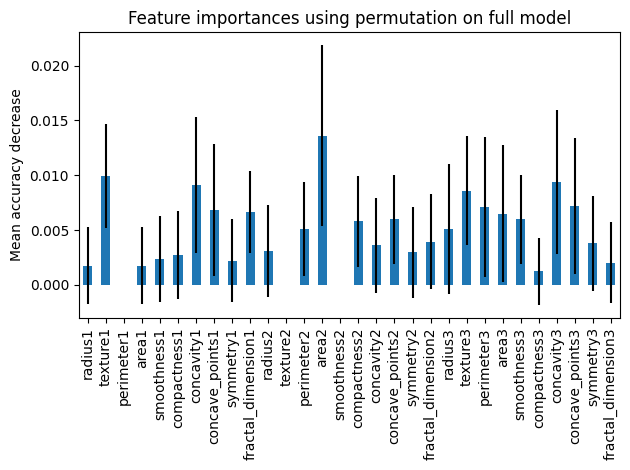

In [5]:
result = permutation_importance(
    rfc, X_test, y_test, n_repeats=100, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=feature_cols)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

A higher mean accuracy decrease implies higher importance of a feature because removing that feature would lead to a larger decrease in accuracy. A lower mean accuracy decrease implies lower importance, and a negative mean accuracy decrease implies the model may even do better if the feature is misleading or redundant. 

The high standard deviations, shown as the black error bar, imply features have highly varying importance for each feature.

The instability of the importance estimates may need a larger dataset to more accurately show which features are more important. It is also possible that groups of features, rather than individual features contribute to the prediction. 

The graph below shows the feature importance of a single DecisionTreeClassifier. It varies greatly from the graph for the Random Forest Model and shows different importance for most features. Some features are 0 since they either have no importance, or they were not selected when training this particular tree since the random forest classifier only gives each tree a random part of the features to train on.

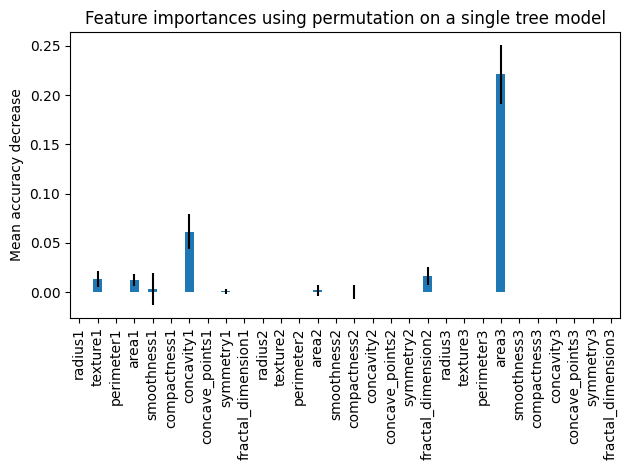

In [6]:
clf = rfc.estimators_[0].fit(X_train, y_train)
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
tree_importances = pd.Series(result.importances_mean, index=feature_cols)

fig, ax = plt.subplots()
tree_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on a single tree model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Feature Correlation of Features

Another part of the dataset I wanted to explore is which features correlate with each other and whether there is a clear prediction pattern with two features used.

The code for the correlation heatmap is based on [this medium article](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e).

The heatmaps show some strong correlations, such as radius being correlated strongly to perimeter1, area1, radius3, perimeter3, and area3. 

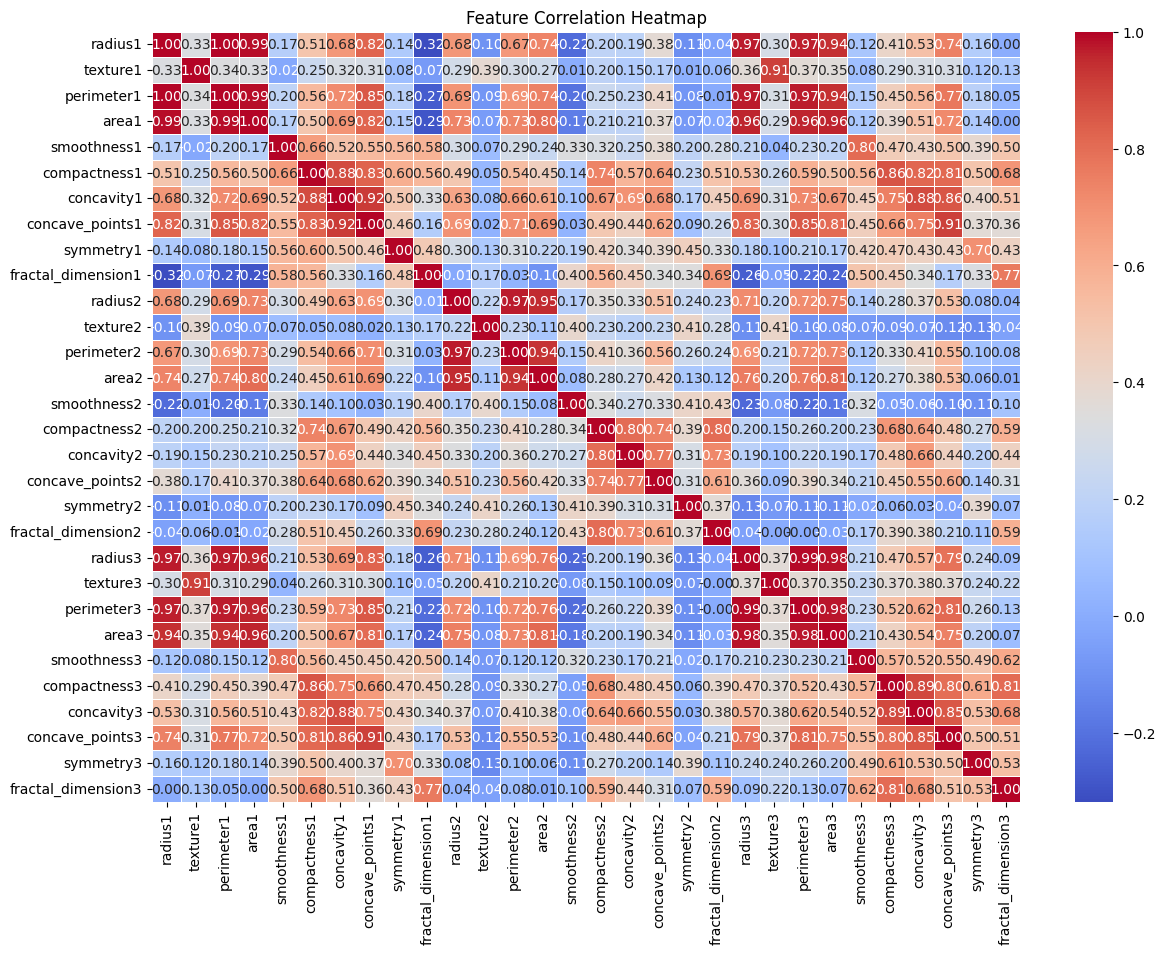

In [7]:
df_features = df[feature_cols]
corr_matrix = df_features.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
def make_chart(df, feature, feature2):
    return alt.Chart(df).mark_circle().encode(
        x=alt.X(feature),
        y=alt.Y(feature2),
        color=alt.Color("Diagnosis:N"),
        tooltip=["Diagnosis", feature, feature2],
    )

make_chart(df, "perimeter1", "radius1")

alt.Chart(...)

Radius1 and perimeter1 had a correlation of 1.00, which is very strong. Plotting the two together along with the diagnosis for color shows a pattern where lower perimeter1 and radius1 measurements tend to be diagnosed as malignant(0)

Another way to visualize correlation other than the correlation matrix is to directly plot each feature variable against each other. Below, I chose compactness1 as an example since its heatmap column above tends to be more positive and strong, indicating more correlation with more features.

In [9]:
chart_list = []
for feature in feature_cols:
    chart_list.append(make_chart(df, "compactness1", feature))
alt.hconcat(*chart_list)

alt.HConcatChart(...)

Below is code to generate and concatenate all possible combinations of the 30 features. Along with plotting points between two axes representing two features, I added the diagnosis color to highlight if any patterns exist for pairs of features.

In [10]:
chart_list = []

for i in range(len(feature_cols)):
    feature1charts=[]
    for j in range(i,len(feature_cols)):
        feature = feature_cols[i]
        feature2 = feature_cols[j]
        chart = make_chart(df, feature, feature2)
        feature1charts.append(chart)
    hconcat_chart = alt.hconcat(*feature1charts).properties(
        title=f"Charts for Feature: {feature}"
    )
    chart_list.append(hconcat_chart)
final_chart = alt.vconcat(*chart_list).properties(
    title="Feature Correlations and Diagnosis Predictions"
)

In [11]:
final_chart

alt.VConcatChart(...)

In [12]:
make_chart(df, "radius1", "perimeter3")

alt.Chart(...)

The chart between radius1 and perimeter3 is an interesting chart that shows a more distinct border between the actual diagnosis being benign(0) or malignant(1), and on its own could do a decent job at predicting the diagnosis.

# Logistic Regression

For the logistic regression model, I similarly created and tested 100 models with different test-train splits to generate data about its accuracy. The average accuracy is around 0.95. I had to increase the maximum iterations for the logistic regression model to prevent excessive errors about the maximum iteration limit being reached.

In [19]:
clf = LogisticRegression(max_iter = 10000)
logistic_accuracy = [accuracy_score(y_test, clf.fit(X_train, y_train).predict(X_test)) 
for i in range(100) 
for X_train, X_test, y_train, y_test in [train_test_split(df[feature_cols], df['Diagnosis'], random_state=i, test_size=0.2)]
]
accuracy_df["LogisticRegression"] = logistic_accuracy

In [17]:
accuracy_df["LogisticRegression"].mean()

0.9521929824561404

# K-Nearest Neighbors

In this section, I implement K-Nearest Neighbors, a supervised machine learning method that is useful for categorization problems, while K-Means Clustering is usually better for a lower amount of features and is considered unsupervised machine learning. I chose k=10 since it seemed like a medium option and K-Nearest Neighbors is prone to overfitting if k is too small. Essentially, if k is too small, the model memorizes the training data and is more sensitive to noise.

In [21]:
k=10
knn = KNeighborsClassifier(n_neighbors=k)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_cols],
    df["Diagnosis"],
    train_size = 0.5,
    random_state = 2025
)
knn.fit(X_train, y_train)
df["pred"] = knn.predict(df[feature_cols])
df

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,pred
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
564,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
565,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
566,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


## K-Nearest Neighbors with k =5,10,20 neighbors

Creating a function to append a new column to accuracy_df to later be plotted as a bar graph.

In [23]:
def Knearest_neighbors(k):
    Knearest_neighbors = [
        accuracy_score(
            y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)
        )
        for i in range(100)
        for X_train, X_test, y_train, y_test in [train_test_split(df[feature_cols], df['Diagnosis'], random_state=i, test_size=0.2)]
    ]
    accuracy_df[f"Knn({k} neighbors)"] = Knearest_neighbors
Knearest_neighbors(5)#Each function call appends a new column to accuracy_df
Knearest_neighbors(10)
Knearest_neighbors(20)

# Plotting Model Accuracies Together

Bar chart based on this [Altair code](https://altair-viz.github.io/gallery/errorbars_with_std.html).

To plot model accuracies as a bar chart, the data must first be transformed from a data frame that has model names as the column names to a data frame with two columns, one with the model name (ex: RandomForrestClassifier) and the accuracy of the specific model iteration. The melt method is useful for this. Then, the data can be plotted with Accuracy on the x-axis and the model name on the y-axis. I chose an error bar plot to show the Interquartile Range of each model's accuracy, along with a dot to represent the mean. 

In [24]:
accuracy_df_long = accuracy_df.melt(var_name='Model', value_name='Accuracy')
accuracy_df_long
accuracy_df_long.sample(n=5)

,Model,Accuracy
201,LogisticRegression,0.956140
29,RandomForestClassifier,0.982456
83,RandomForestClassifier,0.947368
483,Knn(10 neighbors),0.929825
492,Knn(10 neighbors),0.894737


In [25]:
error_bars = alt.Chart(accuracy_df_long).mark_errorbar(extent='iqr',color ='blue').encode(
  x=alt.X('Accuracy:Q',scale = alt.Scale(zero=False,domain=[0.8, 1])),
  y=alt.Y('Model')
)

points = alt.Chart(accuracy_df_long).mark_point(filled=True, color='blue').encode(
  x=alt.X('mean(Accuracy)',title = "Interquartile Range",scale = alt.Scale(zero=False,domain=[0.8, 1])),
  y=alt.Y('Model'),
)
error_bars+points

/toolkit-cache/0.2.11/python3.10/kernel-libs/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

## Summary

In conclusion, the models used were successfully implemented and predicted diagnosis well, with a mean accuracy of above 0.92. The Random Forest model was the best model to use with an mean accuracy of above 0.95. The process of training and testing models was interesting since we have not dealt with much data with so many features and a relatively small sample of data. 
Learning how to use K-Nearest Neighbors and looking at feature correlations was interesting as well. I found that some variables strongly correlated with each other and showed a clear pattern in diagnosis so I am curious if smaller models with less feautures would perform better by replacing or removing redundant features. I believe machine learning can be useful in many different fields, including medicine and diagnosis and this project helped me understand and apply it to that field. 

## References

* What is the source of your dataset(s)?
The source of my data set is from the UCI Machine Learning Repository.
Citation:
Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.


* List any other references that you found helpful.
I found code examples from Altair useful, such as this [error bar chart](https://altair-viz.github.io/gallery/errorbars_with_std.html), this [example on finding forest feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html), [Medium article on correlation heatmaps](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)and the K-Nearest Neighbors lecture from March 24.

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e8f7fbf3-646c-46cc-8aae-a227f1a66bb8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>